## Model description

The Roessler (Rössler) attractor is the attractor for the Rössler system, a system of three non-linear ordinary differential equations that define a continuous-time dynamical system exhibiting chaotic dynamics associated with the fractal properties of the attractor. We refer to the wikipedia article [Roessler attractor](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) for details.

The Roessler attactor is modeled by the ODE

$$
     \left\{   \begin{array}{lcl}    \dot{x} & = & - y - z \\    \dot{y} & = & x + a\cdot y \\    \dot{z} & = & b + z\cdot (x - c)   \end{array}   \right.  
$$

The numerical values for the model's constants are given in the following table.

|Quantity |Value  |
|---------|-------|
|a        | 0.2   |
|b        | 0.2   |
|c        | 5.7   |

In [1]:
using Reachability, MathematicalSystems, TaylorIntegration

In [2]:
@taylorize function roessler!(du, u, p, t)
    local a, b, c = 0.2, 0.2, 5.7

    du[1] = -u[2] - u[3]
    du[2] = u[1] + (a * u[2])
    du[3] = b + (u[3]*(u[1] - c))

    return du
end

## Reachability settings

We consider the initial set  $x \in [-0.2,0.2]$,  $y \in [-8.6,-8.2]$,  $z \in [-0.2,0.2]$. These settings are taken from the HyPro benchmarks [1].

[1] https://ths.rwth-aachen.de/research/projects/hypro/roessler-attractor/

In [3]:
x₀ = Interval(-0.2, 0.2)
y₀ = Interval(-8.6, -8.2)
z₀ = Interval(-0.2, 0.2)

X₀ = x₀ × y₀ × z₀;

In [4]:
S = BlackBoxContinuousSystem(roessler!, 3)
P = InitialValueProblem(S, X₀);

## Results

The following figure shows the $yz$  projection of an overapproximation computed with the TMJets algorithm for the time horizon $[0,6]$.

In [5]:
sol = solve(P, Options(:T=>6.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots

Since the flowpipe is three-dimensional, we have to project it. We project onto dimensions $y$ and $z$:

In [7]:
πsol = Vector{Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}}()
for s in sol.Xk
    πs = project(set(s), [2, 3], LazySets.LinearMap)
    oπs = overapproximate(πs, Hyperrectangle)
    push!(πsol, oπs)
end
typeof(πsol), length(πsol)

(Array{Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}},1}, 742)

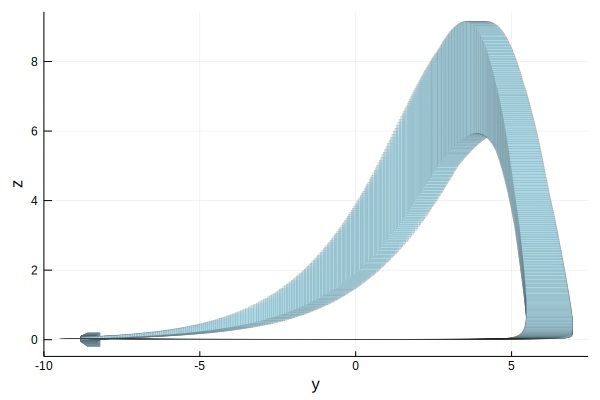

In [8]:
plot(πsol, xlab="y", ylab="z", lw=0.2, color=:lightblue, lab="")